# Importação das Bibliotecas

In [10]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from composicao_histograma_boxplot import composicao_histograma_boxplot
from composicao_histograma_boxplot import calcular_estatisticas

# Leitura e Análise da Base

In [4]:
# Leitura da planilha 
DADOS = r"C:\Users\rodri\OneDrive\Sincronização\Documentos\GitHub\hypothesis_test_healthy_program\data\teste_hipoteses_programa_saude.xlsx"
df = pd.read_excel(DADOS)

# Visualizar as primeiras linhas da tabela
df.head()

,Amostra,Colesterol (mg/dL)
0,1,180.8
1,2,176.5
2,3,203.6
3,4,205.7
4,5,162.1


In [5]:
# Visualizar as últimas linhas da tabela
df.tail()

,Amostra,Colesterol (mg/dL)
215,216,212.7
216,217,187.0
217,218,185.4
218,219,221.7
219,220,154.8


In [6]:
# Conferir os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Amostra             220 non-null    int64  
 1   Colesterol (mg/dL)  220 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.6 KB


# Identificação do Problema

In [9]:
media = df["Colesterol (mg/dL)"].mean().round(1)
desvio_padrao = df["Colesterol (mg/dL)"].std().round(2)
n = len(df)

print("Tamanho da Amostra")
print(n)
print("="*40)
print("Média Amostral")
print(media)
print("="*40)
print("Desvio Padrão Amostral")
print(desvio_padrao)

Tamanho da Amostra
220
Média Amostral
192.3
Desvio Padrão Amostral
19.38


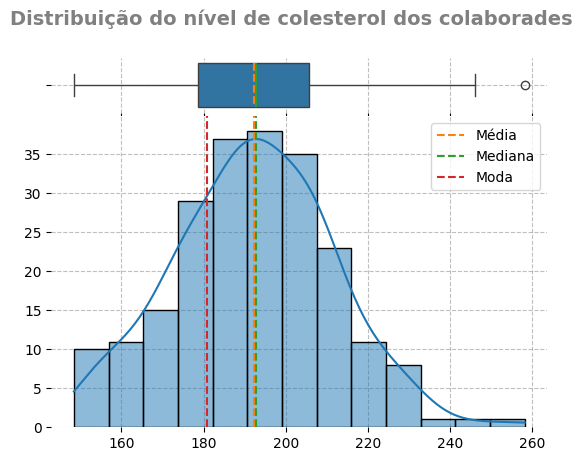

In [11]:
composicao_histograma_boxplot(df, "Colesterol (mg/dL)", titulo="Distribuição do nível de colesterol dos colaborades")

# Teste de Hipóteses

In [21]:
# Dados
amostra = df["Colesterol (mg/dL)"]
valor_referencia = 190
alpha = 0.05  # Nível de significância

In [22]:
# Teste t
t_stat, p_valor = stats.ttest_1samp(amostra, valor_referencia)

In [23]:
# Ajuste do p-valor para teste unilateral (H1: média > 190)
if t_stat > 0:
    p_valor /= 2  # Pegamos apenas a metade direita da distribuição
else:
    p_valor = 1 - (p_valor / 2)  # Caso contrário, ajustamos para o outro lado

In [30]:
# Exibição dos resultados
print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_valor * 100:.1f}%") 

if p_valor < alpha:
    print("Rejeitamos H0: A média do colesterol é significativamente maior que 190.")
else:
    print("Não rejeitamos H0: Não há evidências suficientes para dizer que a média é maior que 190.")

Estatística t: 1.72
Valor-p: 4.3%
Rejeitamos H0: A média do colesterol é significativamente maior que 190.
